In [1]:
import numpy as np
import pickle 
import sys, os
sys.path.append("..")
from logger import Logger
import matplotlib.pyplot as plt

In [13]:
def get_logger(pth):
    try: 
        with open(pth, 'rb') as f:
            logger = pickle.load(f)
    except:
        print(pth + " not found")
        return None 
    
    logger.train_loss = np.asarray(logger.train_loss)
    logger.train_conf = np.asarray(logger.train_conf)

    logger.valid_loss = np.asarray(logger.valid_loss)
    logger.valid_conf = np.asarray(logger.valid_conf)

    logger.test_loss = np.asarray(logger.test_loss)
    logger.test_conf = np.asarray(logger.test_conf)

    logger.elapsed_time = np.asarray(logger.elapsed_time)
    
    return logger

How to the results look when we just train for a long time? 

In [4]:
cva_pref = '../cva_sine_result_files/longeval__'
cva_suff = '_0_1.pkl'
amnts = ['10', '100', '1000', '10000']
i_updates = ['20', '50', '100', '500']

loggers = {}
for amnt in amnts:
    loggers[amnt] = {}
    for i in i_updates:
        loggers[amnt][i] = get_logger(cva_pref + amnt + '_' + i + cva_suff)    

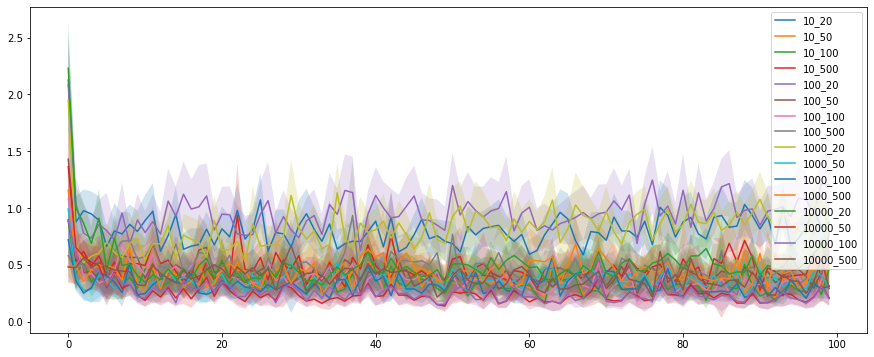

In [8]:
for amnt, logger in loggers.items():
    for i, lgr in logger.items():
        x = np.arange(len(lgr.test_loss))
        plt.plot(x, lgr.test_loss, label=amnt+"_"+i)
        plt.fill_between(x, lgr.test_loss+lgr.test_conf, lgr.test_loss-lgr.test_conf, alpha=0.2)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(15,6)
# plt.ylim(0,.5)
plt.show()

What about if we use a much smaller learning rate? 

In [9]:
cva_pref = '../cva_sine_result_files/lowlr__'
cva_suff = '_0_1.pkl'
amnts = ['10', '100', '1000']
i_updates = ['40', '100']

loggers = {}
for amnt in amnts:
    loggers[amnt] = {}
    for i in i_updates:
        loggers[amnt][i] = get_logger(cva_pref + amnt + '_' + i + cva_suff)    

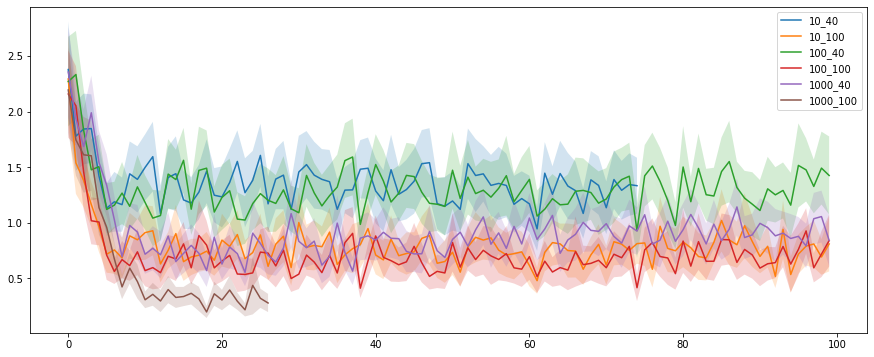

In [10]:
for amnt, logger in loggers.items():
    for i, lgr in logger.items():
        x = np.arange(len(lgr.test_loss))
        plt.plot(x, lgr.test_loss, label=amnt+"_"+i)
        plt.fill_between(x, lgr.test_loss+lgr.test_conf, lgr.test_loss-lgr.test_conf, alpha=0.2)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(15,6)
# plt.ylim(0,.5)
plt.show()


This seems to indicate that, when using the smaller learning rate, we may need to fine tune longer. 

## What about resetting the embeddings periodically?

In [23]:
cva_pref = '../cva_sine_result_files/finalreset_'
cva_suff = '_40_0_1.pkl'
amnts = ['1', '10', '100', '1000', '10000']
r_freqs = ['1', '10', '100', '1000', '10000']

loggers = {}
for i in r_freqs:
    loggers[i] = {}
    for amnt in amnts:
        tmp = get_logger(cva_pref + i + '_' + amnt + cva_suff)
        if tmp is not None: 
            loggers[i][amnt] = tmp

../cva_sine_result_files/finalreset_1_10000_40_0_1.pkl not found
../cva_sine_result_files/finalreset_10_1_40_0_1.pkl not found
../cva_sine_result_files/finalreset_10_10_40_0_1.pkl not found
../cva_sine_result_files/finalreset_10_100_40_0_1.pkl not found
../cva_sine_result_files/finalreset_10_1000_40_0_1.pkl not found
../cva_sine_result_files/finalreset_10_10000_40_0_1.pkl not found
../cva_sine_result_files/finalreset_100_10_40_0_1.pkl not found
../cva_sine_result_files/finalreset_1000_10_40_0_1.pkl not found
../cva_sine_result_files/finalreset_10000_10_40_0_1.pkl not found


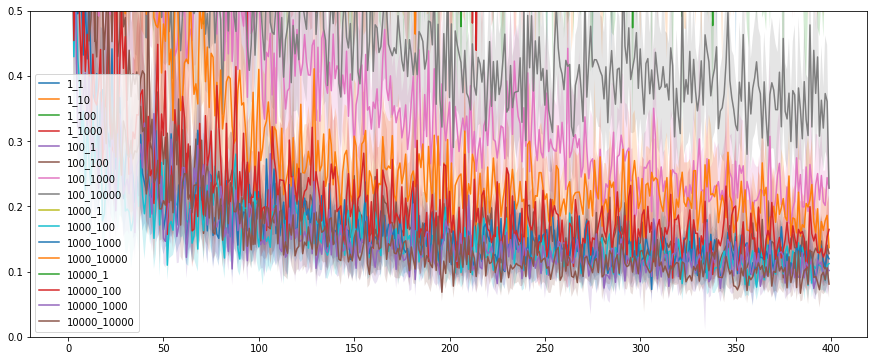

In [24]:
for amnt, logger in loggers.items():
    for i, lgr in logger.items():
        x = np.arange(len(lgr.test_loss))
        plt.plot(x, lgr.test_loss, label=amnt+"_"+i)
        plt.fill_between(x, lgr.test_loss+lgr.test_conf, lgr.test_loss-lgr.test_conf, alpha=0.2)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(15,6)
plt.ylim(0,.5)
plt.show()


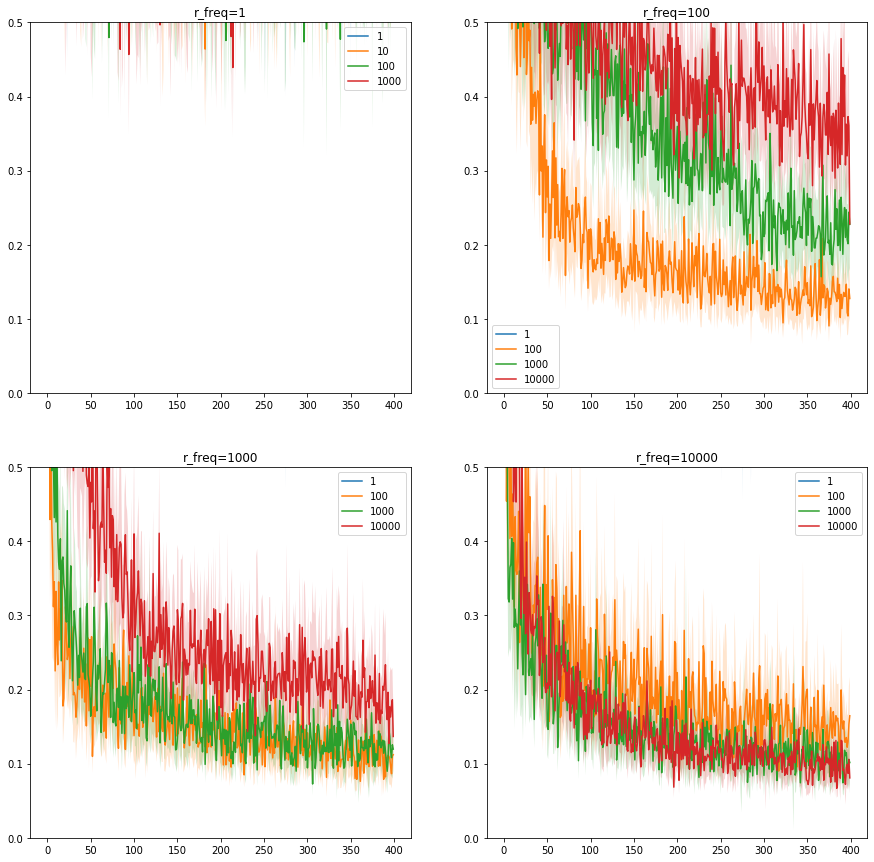

In [31]:
# plot on separate plots
plt.subplot(2, 2, 1)
for i, lgr in loggers['1'].items():
    x = np.arange(len(lgr.test_loss))
    plt.plot(x, lgr.test_loss, label=i)
    plt.fill_between(x, lgr.test_loss+lgr.test_conf, lgr.test_loss-lgr.test_conf, alpha=0.2)
plt.legend() 
plt.ylim(0,.5)
plt.title('r_freq=1')

plt.subplot(2, 2, 2)
for i, lgr in loggers['100'].items():
    x = np.arange(len(lgr.test_loss))
    plt.plot(x, lgr.test_loss, label=i)
    plt.fill_between(x, lgr.test_loss+lgr.test_conf, lgr.test_loss-lgr.test_conf, alpha=0.2)
plt.legend() 
plt.ylim(0,.5)
plt.title('r_freq=100')

plt.subplot(2, 2, 3)
for i, lgr in loggers['1000'].items():
    x = np.arange(len(lgr.test_loss))
    plt.plot(x, lgr.test_loss, label=i)
    plt.fill_between(x, lgr.test_loss+lgr.test_conf, lgr.test_loss-lgr.test_conf, alpha=0.2)
plt.legend() 
plt.ylim(0,.5)
plt.title('r_freq=1000')

plt.subplot(2, 2, 4)
for i, lgr in loggers['10000'].items():
    x = np.arange(len(lgr.test_loss))
    plt.plot(x, lgr.test_loss, label=i)
    plt.fill_between(x, lgr.test_loss+lgr.test_conf, lgr.test_loss-lgr.test_conf, alpha=0.2)
plt.legend() 
plt.ylim(0,.5)
plt.title('r_freq=10000')


fig = plt.gcf()
fig.set_size_inches(15,15)
plt.show() 